# PDF Highlighting Demo

### After you've trained the model in the app, you can use Indico's API to create a pipeline to predict on new documents and use positional coordinates to apply highlights to the source document. 

In [1]:
from pprint import pprint
from example_pipeline import get_client, ocr_pdf_document, get_predictions
from highlighter import OnDoc, print_color_map
from wand.image import Image as WImage

PDF_PATH = './amazon_invoice.pdf'
OUTPUT_PATH = './jupyter_example_w_labels.pdf'
TOKEN_PATH = './indico_api_token.txt'
HOST = 'app.indico.io'
MODEL_ID = 26704

### In this example, we are going to predict using a model that extracts data from invoices. Below is the sample pdf we will be using. 

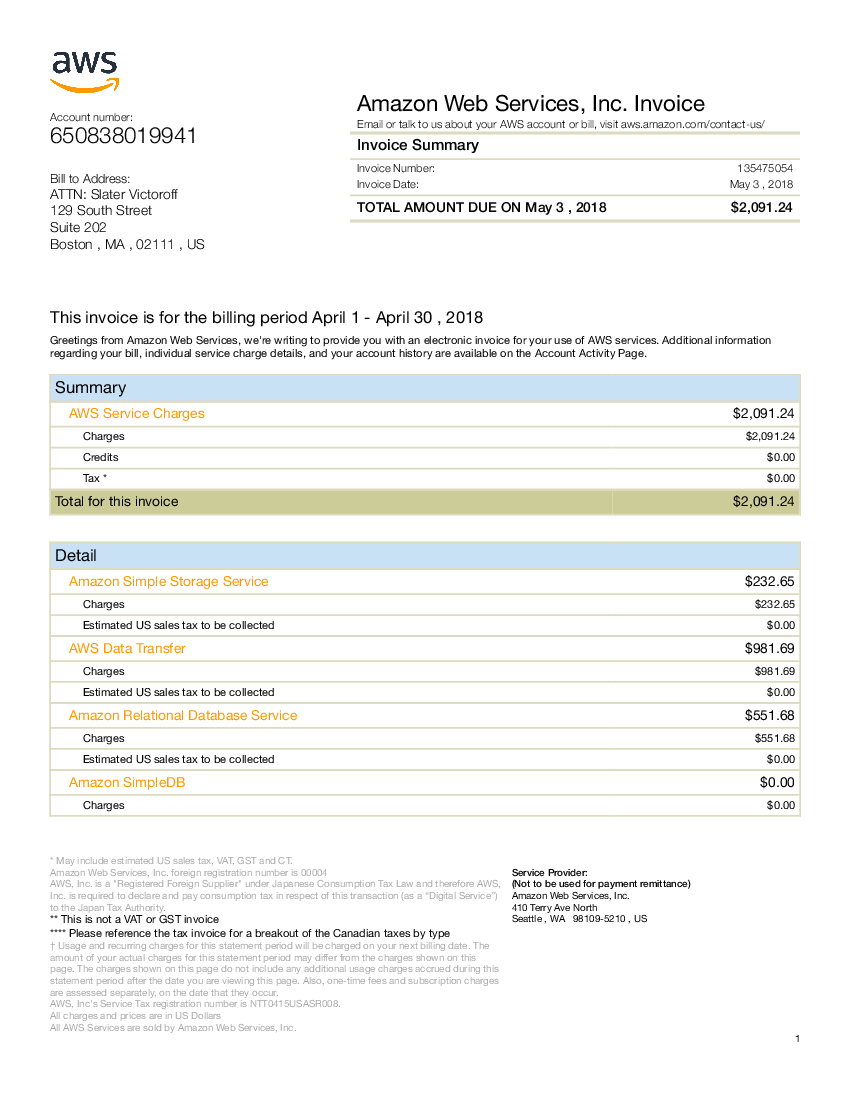

In [13]:
img = WImage(filename=PDF_PATH, resolution=100)
img

### The first step is to use the Indico API to extract positional data, tables, text, and objects from the source PDF

In [19]:
client = get_client(host=HOST, api_token_path=TOKEN_PATH)
ocr_result = ocr_pdf_document(client, pdf_path=PDF_PATH)

### Below you can see an example of the positional information that is extracted from the PDF. In addition to location on the page, the API provides metadata including the size, color, and font of text.

In [22]:
pprint(ocr_result[0]['tokens'][0])

{'block_offset': {'end': 7, 'start': 0},
 'doc_offset': {'end': 7, 'start': 0},
 'page_num': 0,
 'page_offset': {'end': 7, 'start': 0},
 'position': {'bbBot': 362,
              'bbLeft': 148,
              'bbRight': 268,
              'bbTop': 337,
              'bottom': 362,
              'left': 148,
              'right': 268,
              'top': 337},
 'style': {'background_color': '',
           'bold': 'False',
           'font_face': 'DejaVu Serif',
           'font_size': 166,
           'italic': 'False',
           'text_color': '',
           'underlined': 'False'},
 'text': 'Account'}


###  Once we've collected the raw data from the PDF, we can then feed it into the model we trained to obtain predictions. 

In [24]:
predictions = get_predictions(client, OnDoc(ocr_result).full_text, model_id=MODEL_ID)

### Below, you can see that with only 40 labeled examples, the model correctly predicts the 'Vendor' as AWS with 90% confidence

In [26]:
pprint(predictions[0][1])

{'confidence': {'<PAD>': 0.0942082479596138,
                'Account Number': 0.00010658686369424686,
                'Amount': 5.55431361135561e-05,
                'Currency': 0.00047901817015372217,
                'Invoice Number': 0.00030593847623094916,
                'Line Item': 0.006157910916954279,
                'Routing Number': 0.00013710786879528314,
                'Total': 0.0005772627191618085,
                'Vendor': 0.8979724049568176},
 'end': 149,
 'label': 'Vendor',
 'start': 125,
 'text': 'Amazon Web Services, Inc'}


### Finally, we use the model's predictions and document's positional data to apply highlights onto the source document we saw above. This same process can be applied to a variety of extractions, including images, tables, signature blocks, maps, and more.

In [27]:
from highlighter import Highlighter

highlight = Highlighter(ocr_result)

highlight.collect_positions(predictions)

highlight.highlight_pdf(PDF_PATH, OUTPUT_PATH)

### Finally, we can get visualization confirmation that are model is working well and that we are able to apply highlights to the source document to accelerate manual review.

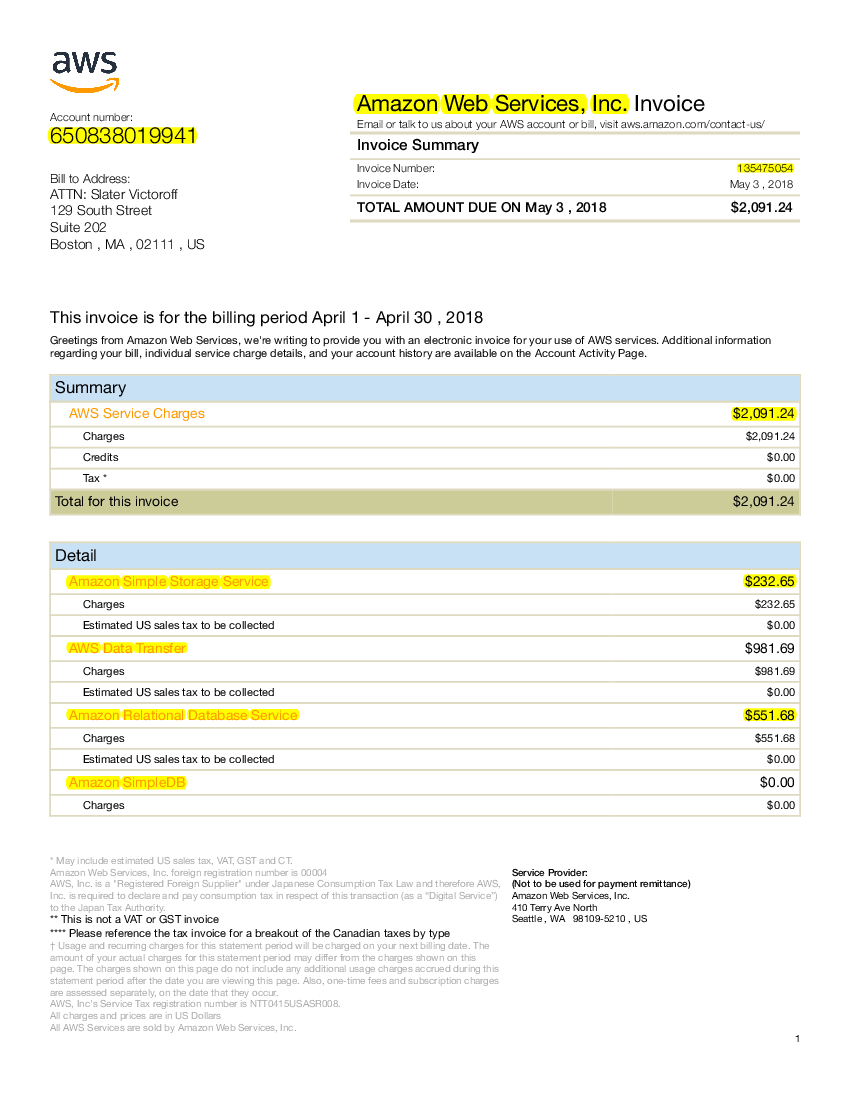

In [28]:
img = WImage(filename=OUTPUT_PATH, resolution=100)

img

### For longer documents, it can also be useful to include a table of contents to let the reader know which pages contain important data and the classes of the data

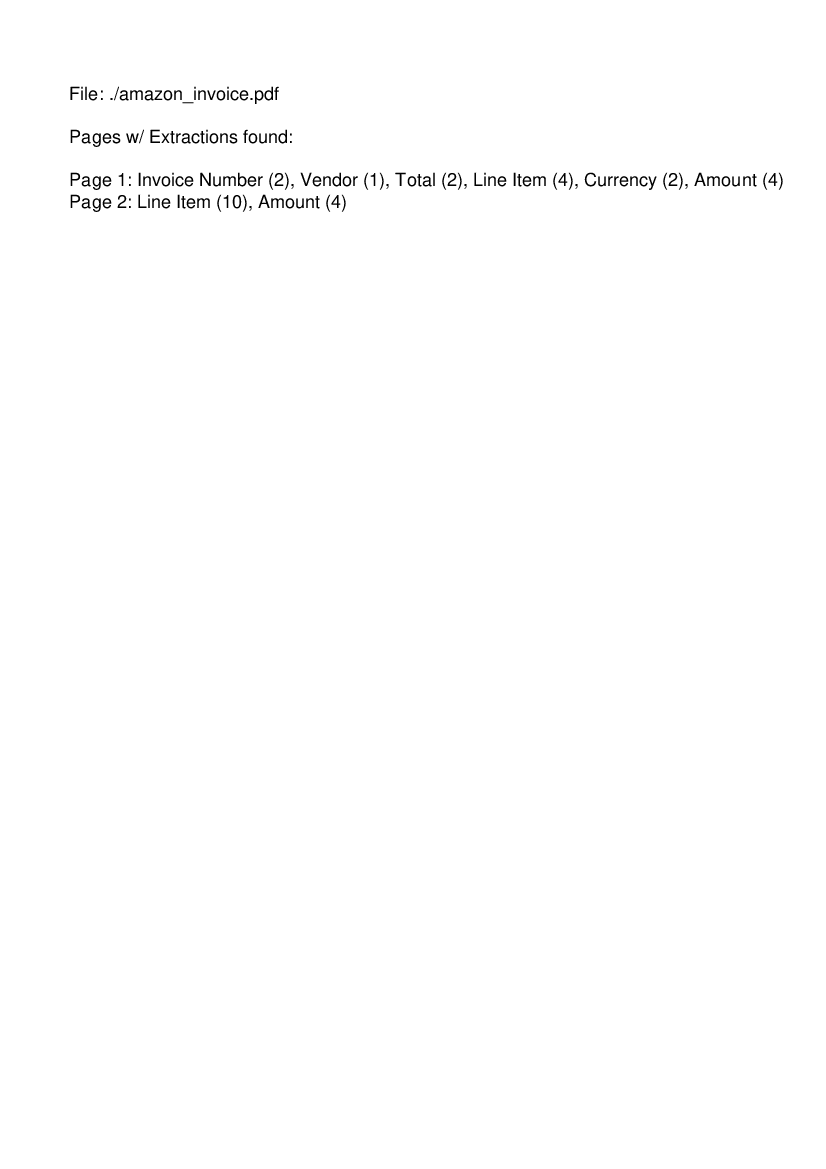

In [29]:
highlight.highlight_pdf(PDF_PATH, OUTPUT_PATH, include_toc=True)

WImage(filename=OUTPUT_PATH, resolution=100)